# IMPORT LIBRARY

In [89]:
import pandas as pd
import seaborn as sns
import warnings 
import matplotlib.pyplot as plt

In [90]:
warnings.filterwarnings('ignore')

In [91]:
df = pd.read_csv("glass.csv")
df.tail()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
209,1.51623,14.14,0.0,2.88,72.61,0.08,9.18,1.06,0.0,headlamps
210,1.51685,14.92,0.0,1.99,73.06,0.00,8.40,1.59,0.0,headlamps
211,1.52065,14.36,0.0,2.02,73.42,0.00,8.44,1.64,0.0,headlamps
212,1.51651,14.38,0.0,1.94,73.61,0.00,8.48,1.57,0.0,headlamps
213,1.51711,14.23,0.0,2.08,73.36,0.00,8.62,1.67,0.0,headlamps


# DATA SCALING

In [92]:
from sklearn.preprocessing import StandardScaler

In [93]:
standardscaler = StandardScaler()

In [94]:
df_set = df[['RI','Fe']]

In [95]:
x_scaled = standardscaler.fit_transform(df_set)

# K-MEANS

In [96]:
from sklearn.cluster import KMeans

In [97]:
model_kmeans = KMeans(n_clusters = 3, random_state = 0)

In [98]:
model_kmeans.fit(x_scaled)

KMeans(n_clusters=3, random_state=0)

In [99]:
labels = model_kmeans.labels_
print(labels)

[2 1 1 1 1 0 1 1 1 1 0 1 0 0 1 1 1 2 1 1 0 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1
 1 2 2 1 1 1 2 0 1 0 2 2 1 2 0 1 1 1 0 0 1 1 1 1 1 2 2 2 2 0 0 0 2 1 0 1 1
 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 0 0 1 1 0 1 0 2 2 0 2 2 2 1 2
 2 2 0 1 1 1 1 0 1 1 0 1 1 2 0 1 0 0 0 2 2 1 0 1 0 0 1 1 1 1 0 0 1 0 0 1 1
 1 1 0 2 1 1 1 1 1 2 1 1 1 0 0 1 1 2 2 1 1 1 2 1 1 1 0 0 1 1 1 1 1 1 1 1 1
 1 1 2 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1]


# EVALUASI K-MEANS DENGAN CROSS TAB

In [100]:
df_kmeans=pd.DataFrame({'labels':labels, 'Type':df.Type})

In [101]:
ct1 = pd.crosstab(df_kmeans['labels'], df_kmeans['Type'])

In [102]:
print(ct1)

Type    building  containers  headlamps  tableware  vehicle
labels                                                     
0             38           2          0          0        3
1             84           8         25          9       12
2             24           3          4          0        2


# VISUALISASI MODEL K-MEANS

## CENTROID K-MEANS

In [103]:
xs = x_scaled[:,0]
ys = x_scaled[:,1]
centroids = model_kmeans.cluster_centers_
centroids_x = centroids[:,0]
centroids_y = centroids[:,1]

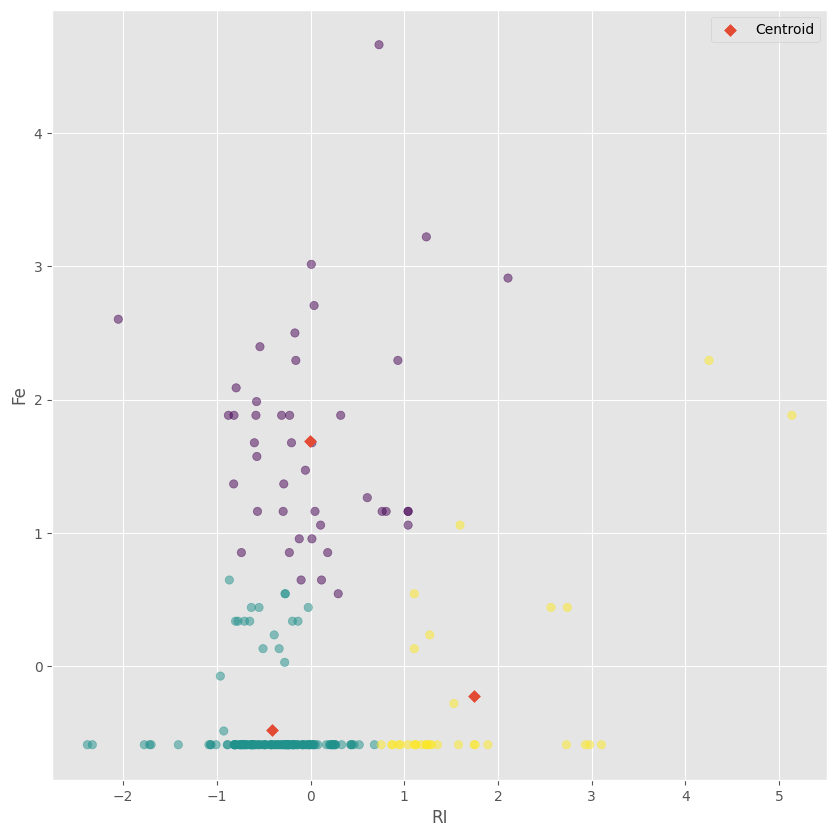

In [104]:
plt.style.use('ggplot')
plt.figure(figsize=(10,10))
plt.scatter(xs,ys, c = labels, alpha = 0.5)
plt.scatter(centroids_x, centroids_y, label = "Centroid", marker = 'D')
plt.xlabel("RI")
plt.ylabel("Fe")
plt.legend()
plt.show()

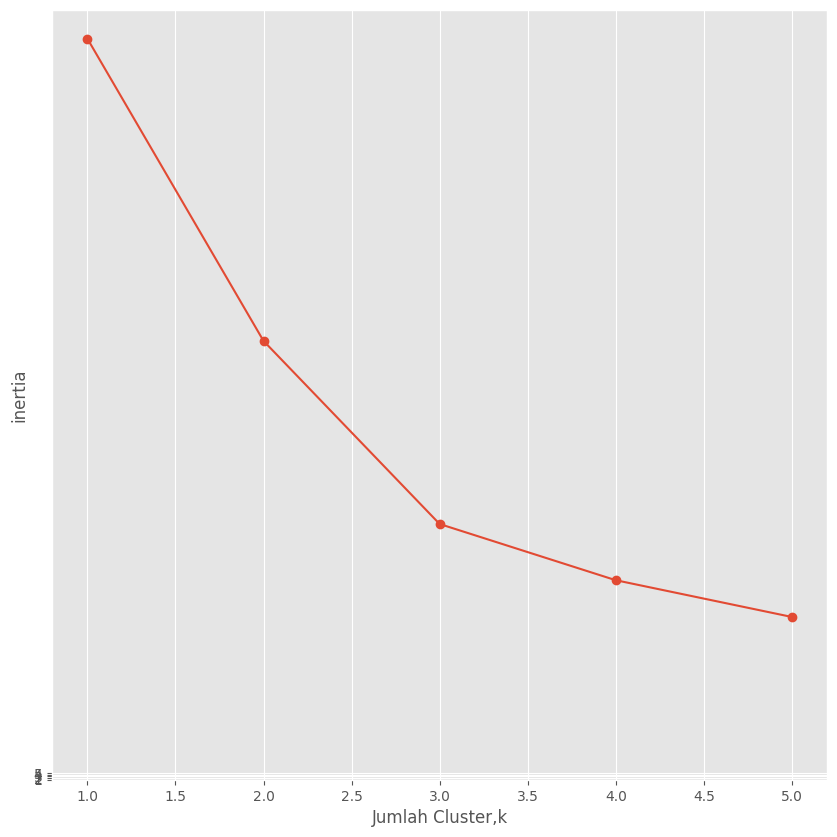

In [105]:
ks = range(1,6)
inertias = []
for k in ks:
    model =KMeans(n_clusters = k)
    model.fit(x_scaled)
    inertias.append(model.inertia_)
plt.figure(figsize=(10,10))
plt.plot(ks, inertias, '-o')
plt.xlabel('Jumlah Cluster,k')
plt.ylabel('inertia')
plt.yticks(ks)
plt.show()